xESMF Test  adaptive Masking
================
## MPI-ESM1-2 MPIOM (HR: TP04, ~0.5°; LR: GR15, ~1.5°)

### Basic Imports

In [1]:
%matplotlib inline
import intake
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe
import scipy
from clisops.core import subset
import clisops as cl
print("Using roocs/clisops in version %s" % cl.__version__)
print("Using xESMF in version %s" % xe.__version__)

xr.set_options(display_style='html');

import warnings
warnings.simplefilter("ignore") 
#with warnings.catch_warnings():
#        warnings.simplefilter("ignore")

Using roocs/clisops in version 0.3.1
Using xESMF in version 0.4.0


### Load the datasets

In [2]:
# Load intake catalogue
col_url = "/work/ik1017/Catalogs/mistral-cmip6.json"
col = intake.open_esm_datastore(col_url)

# Select tos_Omon and fx_areacello for LR and HR model resolution
#  and historical, historical
cat = col.search(activity_id=["CMIP"], 
                 source_id=["MPI-ESM1-2-HR", "MPI-ESM1-2-LR"],
                 experiment_id=["historical"], 
                 member_id="r1i1p1f1", 
                 variable_id=["tos", "areacello"],
                 table_id=["Omon", "Ofx"])

In [3]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path,opendap_url
0,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Ofx,areacello,gn,NaN,v20190710,NaN,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...
1,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Omon,tos,gn,NaN,v20190710,185001-185412,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...
2,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Omon,tos,gn,NaN,v20190710,185501-185912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...
3,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Omon,tos,gn,NaN,v20190710,186001-186412,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...
4,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Omon,tos,gn,NaN,v20190710,186501-186912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...
5,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Omon,tos,gn,NaN,v20190710,187001-187412,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...
6,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Omon,tos,gn,NaN,v20190710,187501-187912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...
7,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Omon,tos,gn,NaN,v20190710,188001-188412,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...
8,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Omon,tos,gn,NaN,v20190710,188501-188912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...
9,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Omon,tos,gn,NaN,v20190710,189001-189412,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...


In [4]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {}, 'decode_times': True})

for dict_key in dset_dict.keys(): print(dict_key)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


CMIP.MPI-M.MPI-ESM1-2-HR.historical.Ofx.gn
CMIP.MPI-M.MPI-ESM1-2-LR.historical.Ofx.gn
CMIP.MPI-M.MPI-ESM1-2-LR.historical.Omon.gn
CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn


In [5]:
# Avoid single value coords
#ds = ds.squeeze()               # Remove single-value dimensions from variables
#ds = ds.reset_coords(drop=True) # Remove unused coordinate entries from ds 
                                 # (drops also the "wrong" coordinates (latitude, longitude))
    
# The grid contains unusable rows and columns (halo etc.)
#  - for the LR model, the first and last column have to be removed (indexes 0 and 255)
#  - for the HR model, the first and last column have to be removed (indexes 0 and 801)
#  - for the HR model, also the first two rows have to be removed (indexes 0 and 1)

# Select last 20 years of historical
ds_LR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-LR.historical.Omon.gn'].sel(time=slice('2010', '2014')).isel(i=slice(1, 255)).squeeze()
ds_HR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn'].sel(time=slice('2010', '2014')).isel(i=slice(1, 801), j=slice(2,405)).squeeze()
# Select gridcell area
#ds_gridLR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-LR.historical.fx.gn'].squeeze()
#ds_gridHR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-HR.historical.fx.gn'].squeeze()
ds_gridOceLR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-LR.historical.Ofx.gn'].isel(i=slice(1, 255)).squeeze()
ds_gridOceHR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-HR.historical.Ofx.gn'].isel(i=slice(1, 801), j=slice(2,405)).squeeze()

### Take a look at the grids

In [6]:
ds_HR

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 800, j: 402, time: 60, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12...
  * j                   (j) int32 2 3 4 5 6 7 8 ... 397 398 399 400 401 402 403
  * i                   (i) int32 1 2 3 4 5 6 7 ... 794 795 796 797 798 799 800
    latitude            (j, i) float64 dask.array<chunksize=(402, 800), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(402, 800), meta=np.ndarray>
    member_id           <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(60, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(402, 800, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(402, 800, 4), meta=np.ndarray>
    tos                 (time, j, i) float32 dask.array<chunksize=(60, 402, 800), meta=np.ndarray>
Attributes:
    title:                   MPI-ESM1-2-HR output prepared for CMIP6
    tracking_id:             hdl:21.14100/ccd8388f-4f80-4a1e-ba47-66fe65bbeec...
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-E...
    parent_mip_era:          CMIP6
    branch_method:           standard
    initialization_index:    1
    intake_esm_varname:      ['tos']
    source_id:               MPI-ESM1-2-HR
    institution_id:          MPI-M
    realm:                   ocean
    sub_experiment:          none
    parent_activity_id:      CMIP
    grid_label:              gn
    forcing_index:           1
    source_type:             AOGCM
    creation_date:           2019-08-25T07:51:32Z
    experiment_id:           historical
    parent_time_units:       days since 1850-1-1 00:00:00
    sub_experiment_id:       none
    contact:                 cmip6-mpi-esm@dkrz.de
    data_specs_version:      01.00.30
    cmor_version:            3.5.0
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    branch_time_in_parent:   0.0
    physics_index:           1
    realization_index:       1
    Conventions:             CF-1.7 CMIP-6.2
    variant_label:           r1i1p1f1
    institution:             Max Planck Institute for Meteorology, Hamburg 20...
    source:                  MPI-ESM1.2-HR (2017): \naerosol: none, prescribe...
    frequency:               mon
    variable_id:             tos
    branch_time_in_child:    0.0
    experiment:              all-forcing simulation of the recent past
    project_id:              CMIP6
    parent_source_id:        MPI-ESM1-2-HR
    history:                 2019-08-25T06:00:45Z ; CMOR rewrote data to be c...
    mip_era:                 CMIP6
    parent_variant_label:    r1i1p1f1
    grid:                    gn
    parent_experiment_id:    piControl
    external_variables:      areacello
    license:                 CMIP6 model data produced by MPI-M is licensed u...
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    table_id:                Omon
    nominal_resolution:      50 km
    product:                 model-output
    activity_id:             CMIP
    intake_esm_dataset_key:  CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn

In [7]:
ds_LR

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 254, j: 220, time: 60, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12...
  * j                   (j) int32 0 1 2 3 4 5 6 ... 213 214 215 216 217 218 219
  * i                   (i) int32 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254
    latitude            (j, i) float64 dask.array<chunksize=(220, 254), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(220, 254), meta=np.ndarray>
    member_id           <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(60, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(220, 254, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(220, 254, 4), meta=np.ndarray>
    tos                 (time, j, i) float32 dask.array<chunksize=(60, 220, 254), meta=np.ndarray>
Attributes:
    title:                   MPI-ESM1-2-LR output prepared for CMIP6
    tracking_id:             hdl:21.14100/40326101-1a73-46bb-a1d8-edb6f6a4da7...
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-E...
    parent_mip_era:          CMIP6
    branch_method:           standard
    initialization_index:    1
    intake_esm_varname:      ['tos']
    source_id:               MPI-ESM1-2-LR
    institution_id:          MPI-M
    realm:                   ocean
    sub_experiment:          none
    parent_activity_id:      CMIP
    grid_label:              gn
    forcing_index:           1
    source_type:             AOGCM
    creation_date:           2019-09-04T13:52:13Z
    experiment_id:           historical
    parent_time_units:       days since 1850-1-1 00:00:00
    sub_experiment_id:       none
    contact:                 cmip6-mpi-esm@dkrz.de
    data_specs_version:      01.00.30
    cmor_version:            3.5.0
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    branch_time_in_parent:   0.0
    physics_index:           1
    realization_index:       1
    Conventions:             CF-1.7 CMIP-6.2
    variant_label:           r1i1p1f1
    institution:             Max Planck Institute for Meteorology, Hamburg 20...
    source:                  MPI-ESM1.2-LR (2017): \naerosol: none, prescribe...
    frequency:               mon
    variable_id:             tos
    branch_time_in_child:    0.0
    experiment:              all-forcing simulation of the recent past
    project_id:              CMIP6
    parent_source_id:        MPI-ESM1-2-LR
    history:                 2019-09-11T14:21:40Z ; CMOR rewrote data to be c...
    mip_era:                 CMIP6
    parent_variant_label:    r1i1p1f1
    grid:                    gn
    parent_experiment_id:    piControl
    external_variables:      areacello
    license:                 CMIP6 model data produced by MPI-M is licensed u...
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    table_id:                Omon
    nominal_resolution:      250 km
    product:                 model-output
    activity_id:             CMIP
    intake_esm_dataset_key:  CMIP.MPI-M.MPI-ESM1-2-LR.historical.Omon.gn

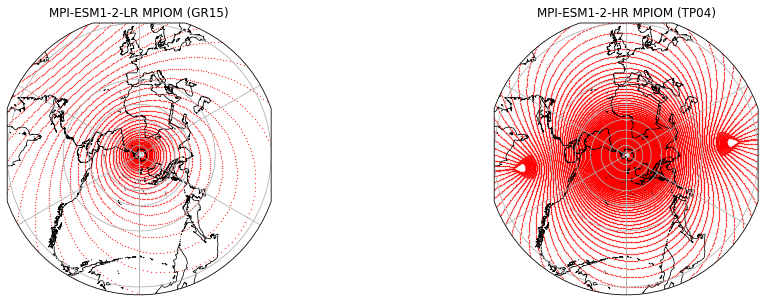

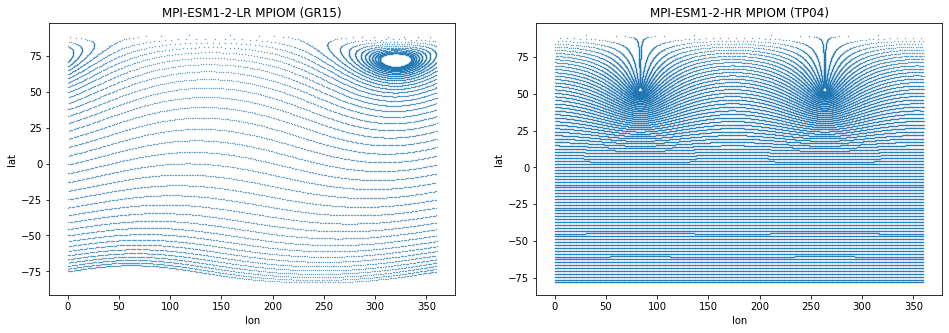

In [8]:
# Plot grid locations LR and HR

# polar projection
def polar_axis():
    '''cartopy geoaxes centered at north pole'''
    # as from https://github.com/JiaweiZhuang/regrid_test/blob/master/debug_bipolar_grid.ipynb
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,5), 
                             subplot_kw={'projection':ccrs.SouthPolarStereo(central_longitude=0)})
    axes[0].coastlines(linewidth=0.75, color='black', resolution='50m')
    axes[1].coastlines(linewidth=0.75, color='black', resolution='50m')
    axes[0].gridlines(crs=ccrs.PlateCarree(), linestyle='-')
    axes[1].gridlines(crs=ccrs.PlateCarree(), linestyle='-')
    axes[0].set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    axes[1].set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    return axes

axes=polar_axis()
axes[0].scatter(x=ds_gridOceLR['longitude'][::5], y=ds_gridOceLR['latitude'][::5], s=0.1,
                transform=ccrs.PlateCarree(), c='r')  
axes[1].scatter(x=ds_gridOceHR['longitude'][::5], y=ds_gridOceHR['latitude'][::5], s=0.1,
                transform=ccrs.PlateCarree(), c='r')  

axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');

# common scatter plot
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,5))
axes[0].scatter(x=ds_gridOceLR['longitude'][::5], y=ds_gridOceLR['latitude'][::5], s=0.1)
axes[1].scatter(x=ds_gridOceHR['longitude'][::5], y=ds_gridOceHR['latitude'][::5], s=0.1)
#axes[1].scatter(x=ds_gridOceHR['longitude'][204, :], y=ds_gridOceHR['latitude'][204, :], s=0.1)
axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');
#axes[1].set_ylim([-10, 10]);
#axes[0].set_ylim([-10, 10]);

### Plot the data

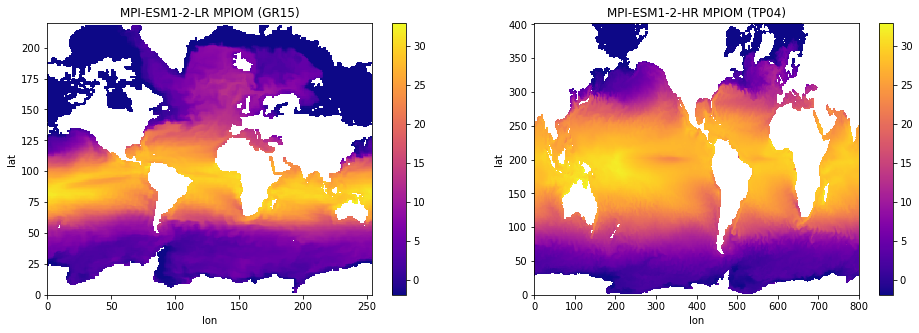

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,5))

im=axes[0].pcolormesh(ds_LR.tos.isel(time=0).values[::-1,:], cmap="plasma")
im=axes[1].pcolormesh(ds_HR.tos.isel(time=0).values[::-1,:], cmap="plasma")  
fig.colorbar(im, ax=axes[1])
fig.colorbar(im, ax=axes[0])

axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');


#plt.figure(figsize=(16,6));
#ax = plt.axes(projection=ccrs.PlateCarree());
#ds_HR.tos.isel(time=0).pcolormesh(ax=ax, x='longitude', y='latitude');
#plt.pcolormesh(ds_HR.tos.isel(time=0).values[::-1,:])
#ax.coastlines();

### Set up the source and destination grid (interpretable by xESMF)

In [10]:
# Read the target grid (1deg, including land-sea-mask, provided by
#   https://github.com/SantanderMetGroup/ATLAS/blob/master/reference-grids/
ds_out=xr.open_dataset("target_grids/land_sea_mask_1degree.nc4")
ds_out

# Alternatively specify a global grid
# ds_out = xe.util.grid_global(5, 5) # global 5 degree grid
# ds_out

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    sftlf    (lat, lon) float32 ...
Attributes:
    dataset:                   http://meteo.unican.es/tds5/dodsC/wfdei/wfdei_...
    source:                    User Data Gateway
    Origin:                    NetCDF file created by loadeR.2nc: https://git...
    Conventions:               CF-1.4
    history:                   Thu Nov 28 17:33:27 2019: ncwa -a time land_se...
    NCO:                       4.4.2
    nco_openmp_thread_number:  1

In [11]:
# Calculate the bounds of the target grid
# The bnds cannot be in CF format, as xESMF conservative regridding requires 
#    certain format of the bnds. See eg.:
#    https://github.com/JiaweiZhuang/xESMF/issues/5
#    https://github.com/JiaweiZhuang/xESMF/issues/74
#    https://github.com/JiaweiZhuang/xESMF/issues/14#issuecomment-369686779
#  
# lat_bnds with shape (nlat+1)
lat_bnds=np.zeros(ds_out.lat.shape[0]+1, dtype="double")
lat_bnds[0]=-90.
lat_bnds[-1]=90.
lat_bnds[1:-1]=(ds_out.lat.values[:-1]+ds_out.lat.values[1:])/2.

# lon_bnds with shape (nlon+1)
lon_bnds=np.zeros(ds_out.lon.shape[0]+1, dtype="double")
lon_bnds[0]=-180.
lon_bnds[-1]=180.
lon_bnds[1:-1]=(ds_out.lon.values[:-1]+ds_out.lon.values[1:])/2.
            
# Create dataset with mask
ds_out_mask=xr.Dataset(data_vars={"mask":(["lat", "lon"], xr.where(ds_out['sftlf']==0, 1, 0)),
                                  "lat_b":(["lat1"], lat_bnds),
                                  "lon_b":(["lon1"], lon_bnds)},
                       coords={"lat":(["lat"], ds_out.lat),
                               "lon":(["lon"], ds_out.lon)})

# Create output dataset unmasked
ds_out=xr.Dataset(data_vars={"lat_b":(["lat1"], lat_bnds),
                             "lon_b":(["lon1"], lon_bnds)},
                  coords={"lat":(["lat"], ds_out.lat),
                          "lon":(["lon"], ds_out.lon)})

# Variable attributes
lat_attrs={"bounds":"lat_b",
           "units":"degrees_north",
           "long_name":"latitude",
           "standard_name":"latitude"}
lon_attrs={"bounds":"lon_b",
           "units":"degrees_east",
           "long_name":"longitude",
           "standard_name":"longitude"}

ds_out["lat"].attrs=lat_attrs
ds_out["lon"].attrs=lon_attrs

In [12]:
# Calculate bounds for input grid (assumes variables vertices_latitude, vertices_longitude)
# reshape from (nlat,nlon,4) to (nlat+1,nlon+1)
def translate_grid_for_xesmf(ds, lat_name="latitude", lon_name="longitude", 
                             lat_vert_name="vertices_latitude", lon_vert_name="vertices_longitude"):
    """Reshapes vertices from (nlat,nlon,4) to (nlat+1,nlon+1). Returns xarray.dataset."""
    lat_bnds=np.zeros(tuple([el+1 for el in list(ds[lat_name].shape)]), dtype="double")
    lat_bnds[:-1, :-1]=ds[lat_vert_name][:,:,3]
    lat_bnds[-1, :-1]=ds[lat_vert_name][-1,:,2]
    lat_bnds[:-1, -1]=ds[lat_vert_name][:,-1,1]
    lat_bnds[-1, -1]=ds[lat_vert_name][-1,-1,0]
    
    lon_bnds=np.zeros(tuple([el+1 for el in list(ds[lon_name].shape)]), dtype="double")
    lon_bnds[:-1, :-1]=ds[lon_vert_name][:,:,3]
    lon_bnds[-1, :-1]=ds[lon_vert_name][-1,:,2]
    lon_bnds[:-1, -1]=ds[lon_vert_name][:,-1,1]
    lon_bnds[-1, -1]=ds[lon_vert_name][-1,-1,0]
    
    ds_xesmf=xr.Dataset(data_vars={"lat_b":(["y1","x1"], lat_bnds),
                                   "lon_b":(["y1","x1"], lon_bnds)},
                        coords={"lat":(["y","x"], ds[lat_name].values),
                                "lon":(["y","x"], ds[lon_name].values)})        
    return ds_xesmf

In [13]:
# Translate the input grid to be conformal with xESMF
ds_in_LR=translate_grid_for_xesmf(ds_LR)
ds_in_HR=translate_grid_for_xesmf(ds_HR)

# incl. mask
ds_in_LR_mask=translate_grid_for_xesmf(ds_LR)
ds_in_LR_mask["mask"]=xr.where(~np.isnan(ds_LR['tos'].isel(time=0)), 1, 0).astype(int)
ds_in_HR_mask=translate_grid_for_xesmf(ds_HR)
ds_in_HR_mask["mask"]=xr.where(~np.isnan(ds_HR['tos'].isel(time=0)), 1, 0).astype(int)

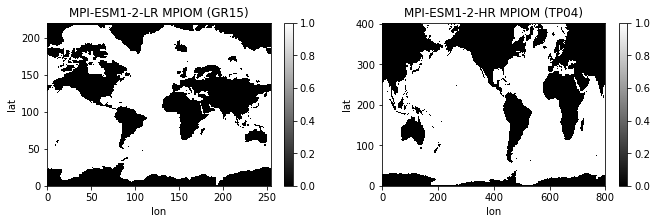

In [14]:
# Plot the masks
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(11,3))

im=axes[0].pcolormesh(ds_in_LR_mask.mask.values[::-1,:], cmap="binary_r")
im=axes[1].pcolormesh(ds_in_HR_mask.mask.values[::-1,:], cmap="binary_r")  

fig.colorbar(im, ax=axes[0])
fig.colorbar(im, ax=axes[1])

axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');

### Create regridding weights in 3 fashions

#### 1  conservative - Source Grid (unmasked) to Target Grid (unmasked)
The mask of the input grid is not accounted for when creating the regridding weights.
That causes some side effects when applying the regridding weights on data that has missing values.

#### 2  conservative_normed - Source Grid (masked) to Target Grid (unmasked) incl. out-of-source-domain Masking
The mask of the input grid is accounted for when creating the regridding weights.   
The conservative_normed method is used so that a renormalization is applied.
Thereafter the add_matrix_NaNs method is applied.

#### 3 conservative - Source Grid (unmasked) to Target Grid (unmasked) incl. Adaptive and out-of-source-domain Masking
The mask of the input grid is not accounted for when creating the regridding weights.
The proper masking and renormalization is done using the "Adaptive Masking" approach and 
applying the out-of-source-domain masking (add_matrix_NaNs) method on the regridding weights.

For more information see: https://github.com/roocs/regrid-prototype/blob/main/docs/notebooks/xESMF_nonpermanent_masks.ipynb

Adaptive masking has been suggested by sraynaud (https://github.com/pangeo-data/xESMF/issues/29#issuecomment-714252254) and Matthew Long (https://github.com/NCAR/esmlab-regrid/blob/master/esmlab_regrid/core.py#L147).
The out-of-source-domain masking (add_matrix_NaNs function) has been suggested by Nic Wayand (https://github.com/JiaweiZhuang/xESMF/issues/15#issuecomment-371646763).

In [15]:
def add_matrix_NaNs(regridder):
    """Add Nans to matrices, which makes any output cell with a weight from a NaN input cell = NaN"""
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    # indptr: https://stackoverflow.com/questions/52299420/scipy-csr-matrix-understand-indptr
    # Creates array with length nrows+1 with information about non-zero values,
    #  with np.diff calculating how many non-zero elements there are in each row
    num_nonzeros = np.diff(M.indptr) 
    # Setting rows with only zeros to NaN
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

def adaptive_masking(ds_in, regridder):
    """Performs regridding incl. renormalization for conservative weights"""    
    validi = ds_in.notnull().astype('d')
    valido = regridder(validi)
    tempi0 = ds_in.fillna(0)
    tempo0 = regridder(tempi0)
    ds_out = xr.where(valido != 0, tempo0 / valido, np.nan)
    return ds_out

In [16]:
# Create regridding weights
# Fixes applied: https://github.com/JiaweiZhuang/xESMF/pull/61
# from https://github.com/JiaweiZhuang/xESMF/issues/60

# In case of problems, activate ESMF verbose mode
import ESMF
ESMF.Manager(debug=True)

# Regridding methods
method_list = ['bilinear','nearest_s2d', 'conservative', 'conservative_normed', 'patch']

# Function to generate the weights
def regrid(ds_in, ds_out, method, periodic, ignore_degenerate=None):
    """Convenience function for calculating regridding weights"""
    return xe.Regridder(ds_in, ds_out, method, periodic=periodic, ignore_degenerate=ignore_degenerate) 

In [17]:
# Generating the weights for LR_to_destination, HR_to_destination regridding
#   Both grids have problems of degenerated cells near the poles and thus require the ignore_degenerate option
regridderLR={}
regridderHR={}

# 1 conservative
#################
print("conservative")
%time regridderLR["conservative"]=regrid(ds_in_LR, ds_out, "conservative", periodic=True, ignore_degenerate=None)    
print(regridderLR["conservative"])  
print()
%time regridderHR["conservative"]=regrid(ds_in_HR, ds_out, "conservative", periodic=True, ignore_degenerate=None)
print(regridderHR["conservative"])  


# 2 conservative_normed
########################
print("\nconservative_normed")
%time regridderLR["conservative_normed"]=regrid(ds_in_LR_mask, ds_out, "conservative_normed", periodic=True, ignore_degenerate=None)    
print(regridderLR["conservative_normed"])  
print()
%time regridderHR["conservative_normed"]=regrid(ds_in_HR_mask, ds_out, "conservative_normed", periodic=True, ignore_degenerate=None)
print(regridderHR["conservative_normed"]) 
# Apply Masking of out-of-domain-values
regridderLR["conservative_normed"]=add_matrix_NaNs(regridderLR["conservative_normed"])
regridderHR["conservative_normed"]=add_matrix_NaNs(regridderHR["conservative_normed"])


# 3 Apply Masking of out-of-domain-values
#   to the conservative weights
##########################################
regridderLR["conservative_NaN"]=add_matrix_NaNs(regridderLR["conservative"])
regridderHR["conservative_NaN"]=add_matrix_NaNs(regridderHR["conservative"])

conservative
CPU times: user 4.16 s, sys: 105 ms, total: 4.26 s
Wall time: 4.26 s
xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_220x254_180x360.nc 
Reuse pre-computed weights? False 
Input grid shape:           (220, 254) 
Output grid shape:          (180, 360) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

CPU times: user 12.8 s, sys: 398 ms, total: 13.2 s
Wall time: 13.1 s
xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_402x800_180x360.nc 
Reuse pre-computed weights? False 
Input grid shape:           (402, 800) 
Output grid shape:          (180, 360) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

conservative_normed
CPU times: user 3.38 s, sys: 75 ms, total: 3.46 s
Wall time: 3.46 s
xESMF Regridder 
Regridding algorithm:       conservative_normed 
Weight filename:            conservative_normed_220x254_180x360.nc 

In [18]:
# Perform regridding

# 1 conservative
ds_out["tos_LR_conservative"]=regridderLR["conservative"](ds_LR.tos)
ds_out["tos_HR_conservative"]=regridderHR["conservative"](ds_HR.tos)

# 2 conservative_normed
ds_out["tos_LR_conservative_normed"]=regridderLR["conservative_normed"](ds_LR.tos)
ds_out["tos_HR_conservative_normed"]=regridderHR["conservative_normed"](ds_HR.tos)

# 3 conservative with adaptive masking
ds_out["tos_LR_conservative_adaptive-masking"]=adaptive_masking(ds_LR.tos, regridderLR["conservative_NaN"])
ds_out["tos_HR_conservative_adaptive-masking"]=adaptive_masking(ds_HR.tos, regridderHR["conservative_NaN"])    

### Plot regridded data

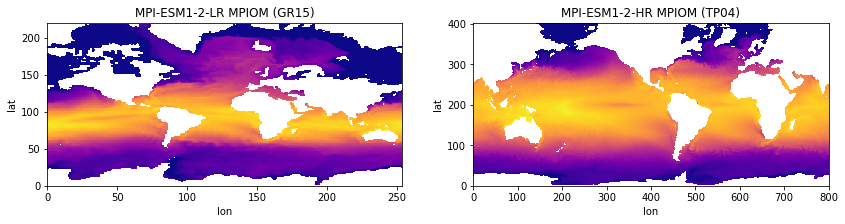

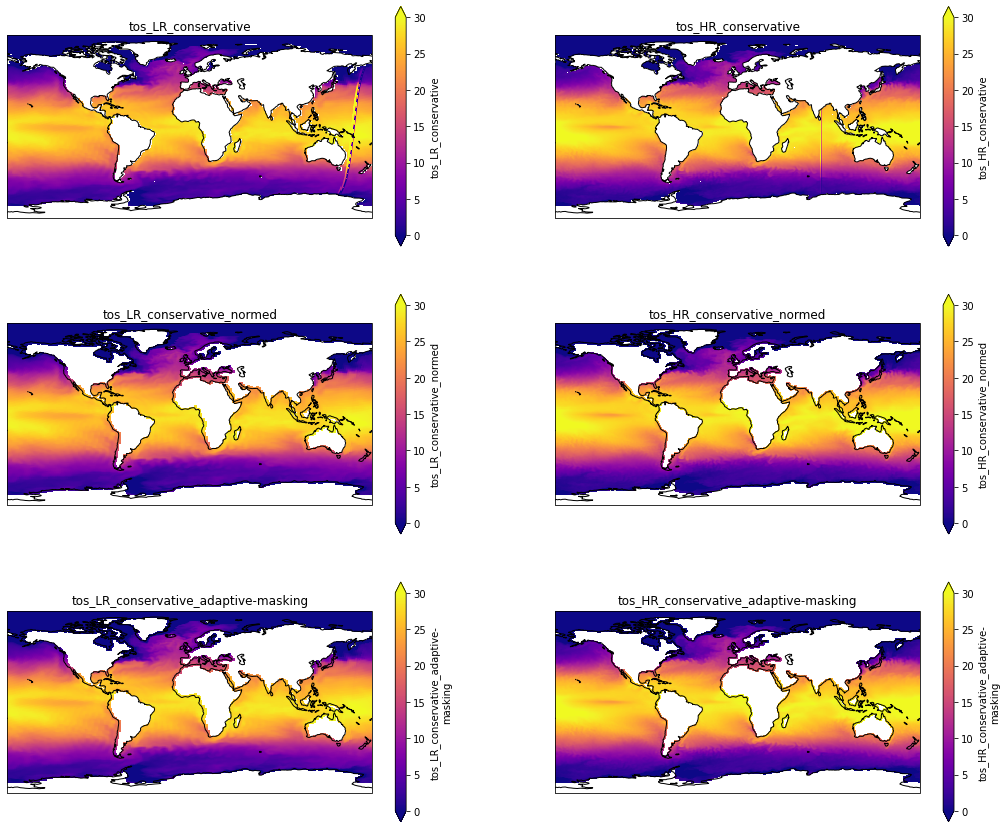

In [19]:
import textwrap

# Create 1st panel plot (data on original grid)
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 3))

axes[0].pcolormesh(ds_LR.tos.isel(time=0).values[::-1,:], cmap="plasma")
axes[1].pcolormesh(ds_HR.tos.isel(time=0).values[::-1,:], cmap="plasma")  
axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');

# Create panel plot of regridded data
fig, axes = plt.subplots(ncols=2, nrows=3, 
                         figsize=(18, 15), # global
                         #figsize=(10, 12), # Japan
                         subplot_kw={'projection': ccrs.PlateCarree()})
    
# Regridded data (from LR)
ds_out["tos_LR_conservative"].isel(time=0).plot.pcolormesh(ax=axes[0,0], vmin=0, vmax=30, cmap="plasma")
axes[0,0].title.set_text("\n".join(textwrap.wrap("tos_LR_conservative", 40)));    
       
# Regridded data (from HR)        
ds_out["tos_HR_conservative"].isel(time=0).plot.pcolormesh(ax=axes[0,1], vmin=0, vmax=30, cmap="plasma")
axes[0,1].title.set_text("\n".join(textwrap.wrap("tos_HR_conservative", 40))); 
        
# Regridded data (from LR)
ds_out["tos_LR_conservative_normed"].isel(time=0).plot.pcolormesh(ax=axes[1,0], vmin=0, vmax=30, cmap="plasma")
axes[1,0].title.set_text("\n".join(textwrap.wrap("tos_LR_conservative_normed", 40))); 
        
# Regridded data (from HR)        
ds_out["tos_HR_conservative_normed"].isel(time=0).plot.pcolormesh(ax=axes[1,1], vmin=0, vmax=30, cmap="plasma")
axes[1,1].title.set_text("\n".join(textwrap.wrap("tos_HR_conservative_normed", 40)));
        
# Regridded data (from LR)
ds_out["tos_LR_conservative_adaptive-masking"].isel(time=0).plot.pcolormesh(ax=axes[2,0], vmin=0, vmax=30, cmap="plasma")
axes[2,0].title.set_text("\n".join(textwrap.wrap("tos_LR_conservative_adaptive-masking", 40))); 
        
# Regridded data (from HR)        
ds_out["tos_HR_conservative_adaptive-masking"].isel(time=0).plot.pcolormesh(ax=axes[2,1], vmin=0, vmax=30, cmap="plasma")
axes[2,1].title.set_text("\n".join(textwrap.wrap("tos_HR_conservative_adaptive-masking", 40)));

# Coast lines and limits
axes[0,0].coastlines();  
axes[0,1].coastlines();
axes[1,0].coastlines();  
axes[1,1].coastlines();
axes[2,0].coastlines();  
axes[2,1].coastlines();

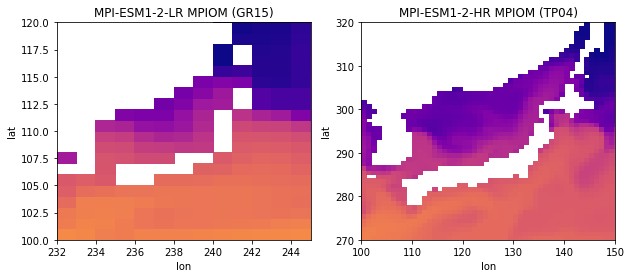

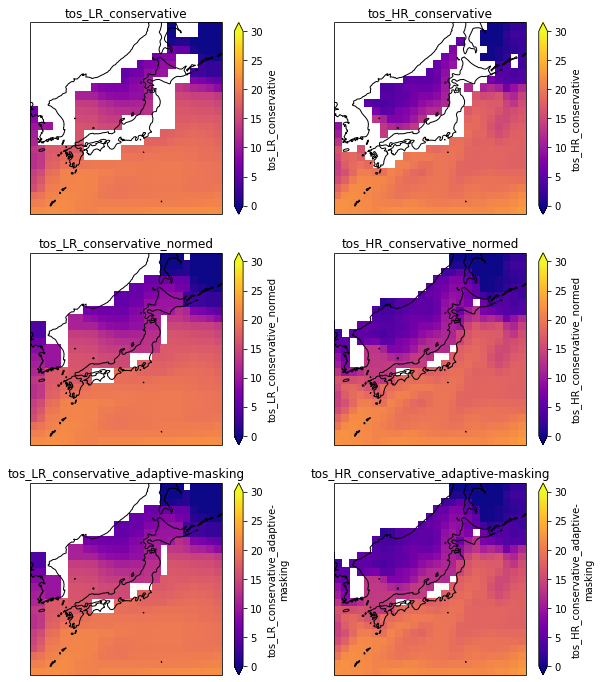

In [20]:
# Create 1st panel plot (data on original grid) for Japan
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))

axes[0].pcolormesh(ds_LR.tos.isel(time=0).values[::-1,:], cmap="plasma")
axes[1].pcolormesh(ds_HR.tos.isel(time=0).values[::-1,:], cmap="plasma")  
axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');

# limits
axes[0].set_ylim([100,120]);
axes[0].set_xlim([232,245]);
axes[1].set_ylim([270,320]);
axes[1].set_xlim([100,150]);


# Create panel plot of regridded data for Japan
fig, axes = plt.subplots(ncols=2, nrows=3, 
                         #figsize=(18, 15), # global
                         figsize=(10, 12), # Japan
                         subplot_kw={'projection': ccrs.PlateCarree()})
    
# Regridded data (from LR)
ds_out["tos_LR_conservative"].isel(time=0).plot.pcolormesh(ax=axes[0,0], vmin=0, vmax=30, cmap="plasma")
axes[0,0].title.set_text("\n".join(textwrap.wrap("tos_LR_conservative", 40)));    
       
# Regridded data (from HR)        
ds_out["tos_HR_conservative"].isel(time=0).plot.pcolormesh(ax=axes[0,1], vmin=0, vmax=30, cmap="plasma")
axes[0,1].title.set_text("\n".join(textwrap.wrap("tos_HR_conservative", 40))); 
        
# Regridded data (from LR)
ds_out["tos_LR_conservative_normed"].isel(time=0).plot.pcolormesh(ax=axes[1,0], vmin=0, vmax=30, cmap="plasma")
axes[1,0].title.set_text("\n".join(textwrap.wrap("tos_LR_conservative_normed", 40))); 
        
# Regridded data (from HR)        
ds_out["tos_HR_conservative_normed"].isel(time=0).plot.pcolormesh(ax=axes[1,1], vmin=0, vmax=30, cmap="plasma")
axes[1,1].title.set_text("\n".join(textwrap.wrap("tos_HR_conservative_normed", 40)));
        
# Regridded data (from LR)
ds_out["tos_LR_conservative_adaptive-masking"].isel(time=0).plot.pcolormesh(ax=axes[2,0], vmin=0, vmax=30, cmap="plasma")
axes[2,0].title.set_text("\n".join(textwrap.wrap("tos_LR_conservative_adaptive-masking", 40))); 
        
# Regridded data (from HR)        
ds_out["tos_HR_conservative_adaptive-masking"].isel(time=0).plot.pcolormesh(ax=axes[2,1], vmin=0, vmax=30, cmap="plasma")
axes[2,1].title.set_text("\n".join(textwrap.wrap("tos_HR_conservative_adaptive-masking", 40)));

# Coast lines and limits
axes[0,0].coastlines();  
axes[0,1].coastlines();
axes[1,0].coastlines();  
axes[1,1].coastlines();
axes[2,0].coastlines();  
axes[2,1].coastlines();
axes[0,0].set_ylim([25, 50]);
axes[0,0].set_xlim([125, 150]);
axes[1,0].set_ylim([25, 50]);
axes[1,0].set_xlim([125, 150]);
axes[2,0].set_ylim([25, 50]);
axes[2,0].set_xlim([125, 150]);
axes[0,1].set_ylim([25, 50]);
axes[0,1].set_xlim([125, 150]);
axes[1,1].set_ylim([25, 50]);
axes[1,1].set_xlim([125, 150]);
axes[2,1].set_ylim([25, 50]);
axes[2,1].set_xlim([125, 150]);

#### Questions:
1. Should a common land-sea-mask be applied to the result?
2. The conservative method gives a band of missing values despite the "periodic=True" setting. This band of missing values is located where the original grid has its eastern and western bounds.
3. Another option would be to supply the conservative_normed or conservative methods with an output mask for the generation of regridding weights. This test case will be added in the near future.
4. It should be investigated if the variable is conserved globally for each of the regridding cases above or in other words if the adaptive masking changes the global mean of the variable compared to the conservative method or the original data. The guess is that a renormalisation (as done by the adaptive masking and conservative normed method) will alter the global mean.

In [21]:
# Apply the common land-sea-mask of the output grid
# Create dataset with and without mask
ds_out["tos_LR_conservative"]=xr.where(ds_out_mask['mask']==0, np.nan, ds_out["tos_LR_conservative"])
ds_out["tos_HR_conservative"]=xr.where(ds_out_mask['mask']==0, np.nan, ds_out["tos_HR_conservative"])
ds_out["tos_LR_conservative_normed"]=xr.where(ds_out_mask['mask']==0, np.nan, ds_out["tos_LR_conservative_normed"])
ds_out["tos_HR_conservative_normed"]=xr.where(ds_out_mask['mask']==0, np.nan, ds_out["tos_HR_conservative_normed"])
ds_out["tos_LR_conservative_adaptive-masking"]=xr.where(ds_out_mask['mask']==0, np.nan, ds_out["tos_LR_conservative_adaptive-masking"])
ds_out["tos_HR_conservative_adaptive-masking"]=xr.where(ds_out_mask['mask']==0, np.nan, ds_out["tos_HR_conservative_adaptive-masking"])

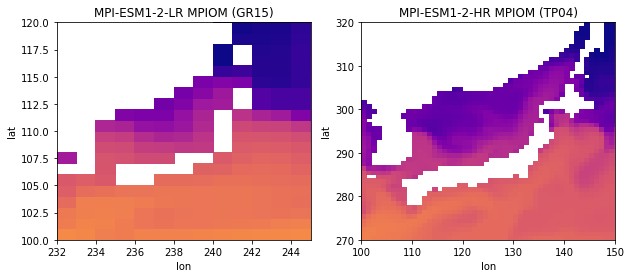

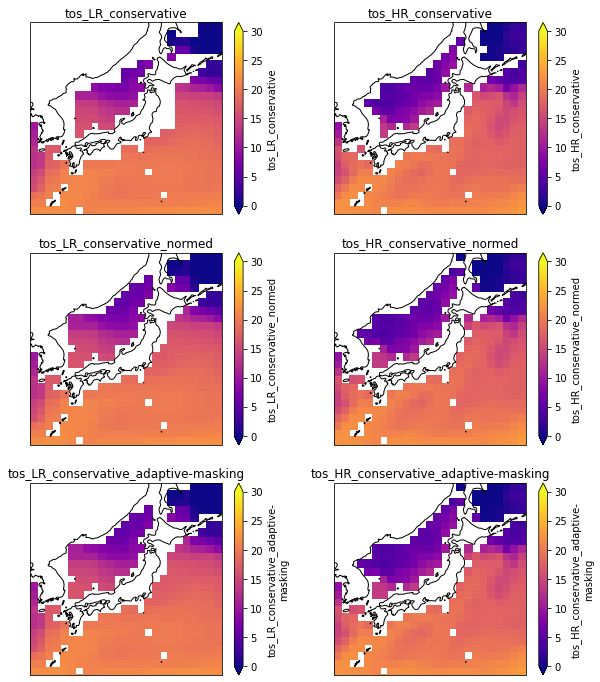

In [22]:
# Create 1st panel plot (data on original grid) for Japan
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))

axes[0].pcolormesh(ds_LR.tos.isel(time=0).values[::-1,:], cmap="plasma")
axes[1].pcolormesh(ds_HR.tos.isel(time=0).values[::-1,:], cmap="plasma")  
axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');

# limits
axes[0].set_ylim([100,120]);
axes[0].set_xlim([232,245]);
axes[1].set_ylim([270,320]);
axes[1].set_xlim([100,150]);


# Create panel plot of regridded data for Japan
fig, axes = plt.subplots(ncols=2, nrows=3, 
                         #figsize=(18, 15), # global
                         figsize=(10, 12), # Japan
                         subplot_kw={'projection': ccrs.PlateCarree()})
    
# Regridded data (from LR)
ds_out["tos_LR_conservative"].isel(time=0).plot.pcolormesh(ax=axes[0,0], vmin=0, vmax=30, cmap="plasma")
axes[0,0].title.set_text("\n".join(textwrap.wrap("tos_LR_conservative", 40)));    
       
# Regridded data (from HR)        
ds_out["tos_HR_conservative"].isel(time=0).plot.pcolormesh(ax=axes[0,1], vmin=0, vmax=30, cmap="plasma")
axes[0,1].title.set_text("\n".join(textwrap.wrap("tos_HR_conservative", 40))); 
        
# Regridded data (from LR)
ds_out["tos_LR_conservative_normed"].isel(time=0).plot.pcolormesh(ax=axes[1,0], vmin=0, vmax=30, cmap="plasma")
axes[1,0].title.set_text("\n".join(textwrap.wrap("tos_LR_conservative_normed", 40))); 
        
# Regridded data (from HR)        
ds_out["tos_HR_conservative_normed"].isel(time=0).plot.pcolormesh(ax=axes[1,1], vmin=0, vmax=30, cmap="plasma")
axes[1,1].title.set_text("\n".join(textwrap.wrap("tos_HR_conservative_normed", 40)));
        
# Regridded data (from LR)
ds_out["tos_LR_conservative_adaptive-masking"].isel(time=0).plot.pcolormesh(ax=axes[2,0], vmin=0, vmax=30, cmap="plasma")
axes[2,0].title.set_text("\n".join(textwrap.wrap("tos_LR_conservative_adaptive-masking", 40))); 
        
# Regridded data (from HR)        
ds_out["tos_HR_conservative_adaptive-masking"].isel(time=0).plot.pcolormesh(ax=axes[2,1], vmin=0, vmax=30, cmap="plasma")
axes[2,1].title.set_text("\n".join(textwrap.wrap("tos_HR_conservative_adaptive-masking", 40)));

# Coast lines and limits
axes[0,0].coastlines();  
axes[0,1].coastlines();
axes[1,0].coastlines();  
axes[1,1].coastlines();
axes[2,0].coastlines();  
axes[2,1].coastlines();
axes[0,0].set_ylim([25, 50]);
axes[0,0].set_xlim([125, 150]);
axes[1,0].set_ylim([25, 50]);
axes[1,0].set_xlim([125, 150]);
axes[2,0].set_ylim([25, 50]);
axes[2,0].set_xlim([125, 150]);
axes[0,1].set_ylim([25, 50]);
axes[0,1].set_xlim([125, 150]);
axes[1,1].set_ylim([25, 50]);
axes[1,1].set_xlim([125, 150]);
axes[2,1].set_ylim([25, 50]);
axes[2,1].set_xlim([125, 150]);